In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!unzip final_datasets.zip

In [0]:
import pandas as pd
import numpy as np

In [0]:
traffic_flow = pd.read_csv("final_dataset.csv")
punctual_incidents = pd.read_csv("out_punctual_incidents.csv")
closed_roads = pd.read_csv("out_closed_roads.csv")

In [5]:
traffic_flow.head()

,Day of year,Hour,week_or_not,road_num,functional_road_class_desc,time_rate,rain,temperature,atmospheric_pressure,humidity,wind_speed,clouds,current_luminosity,atmosphere
0,15.0,19.0,1.0,1.0,3.0,0.999993,0.0,8.0,1019.0,93.0,1.0,12.0,0.0,0.0
1,15.0,19.0,1.0,2.0,3.0,0.292290,0.0,8.0,1019.0,93.0,1.0,12.0,0.0,0.0
2,15.0,19.0,1.0,3.0,1.0,0.793552,0.0,8.0,1019.0,93.0,1.0,12.0,0.0,0.0
3,15.0,19.0,1.0,4.0,2.0,0.545009,0.0,8.0,1019.0,93.0,1.0,12.0,0.0,0.0
4,15.0,20.0,1.0,1.0,3.0,0.999993,0.0,9.0,1020.0,93.0,1.0,20.0,0.0,0.0


In [0]:
x_axis = []
previous_name = ""

for i in traffic_flow.iterrows():
  if(not pd.isnull(i[1][5])):
    
    name = str(i[1][0]) + " ," + str(i[1][1]) 

    if(previous_name != name):
      x_axis.append(name)
    
    previous_name = name

In [7]:
traffic_flow.isnull().sum()

Day of year                      0
Hour                             0
week_or_not                      0
road_num                         0
functional_road_class_desc       0
time_rate                     6360
rain                          6200
temperature                   6200
atmospheric_pressure          6200
humidity                      6200
wind_speed                    6200
clouds                        6200
current_luminosity            6132
atmosphere                    6200
dtype: int64

In [8]:
punctual_incidents.head()

,Day of year,Hour,Minute,magnitude_of_delay_desc,length_in_meters,delay_in_seconds,AvenidaCentral,AvenidaLiberdade,RuaDeCaires,Bosch,week_or_not
0,15,19,0.083333,2,615,111,2871.589353,2871.589353,1767.444236,1267.330940,1
1,15,19,0.083333,2,1008,210,2571.299699,2161.513827,1486.684810,373.585408,1
2,15,19,0.083333,2,615,184,965.778946,1027.212214,1758.926643,3206.313071,1
3,15,19,0.083333,3,322,232,726.759470,855.618311,1665.794200,3053.127261,1
4,15,19,0.083333,3,208,235,2069.868805,2069.868805,1597.478316,2790.436927,1


In [9]:
punctual_incidents.isnull().sum()

Day of year                0
Hour                       0
Minute                     0
magnitude_of_delay_desc    0
length_in_meters           0
delay_in_seconds           0
AvenidaCentral             0
AvenidaLiberdade           0
RuaDeCaires                0
Bosch                      0
week_or_not                0
dtype: int64

In [10]:
closed_roads.head()

,Day of year,Hour,length_in_meters,AvenidaCentral,AvenidaLiberdade,RuaDeCaires,Bosch,week_or_not
0,15,19,88,1582.434953,1206.42697,2467.183987,2947.217154,1
1,15,20,88,1582.434953,1206.42697,2467.183987,2947.217154,1
2,15,21,88,1582.434953,1206.42697,2467.183987,2947.217154,1
3,15,22,88,1582.434953,1206.42697,2467.183987,2947.217154,1
4,15,23,88,1582.434953,1206.42697,2467.183987,2947.217154,1


In [11]:
closed_roads.isnull().sum()

Day of year         0
Hour                0
length_in_meters    0
AvenidaCentral      0
AvenidaLiberdade    0
RuaDeCaires         0
Bosch               0
week_or_not         0
dtype: int64

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler_flow = MinMaxScaler()
traffic_flow_normalized = pd.DataFrame(scaler_flow.fit_transform(traffic_flow.iloc[:,2:]), columns=traffic_flow.columns[2:] )
traffic_flow_normalized['Day of year'] = traffic_flow.iloc[:,0]
traffic_flow_normalized['Hour'] = traffic_flow.iloc[:,1]

punctual_incidents_normalized = pd.DataFrame(scaler_flow.fit_transform(punctual_incidents.iloc[:,3:]),columns=punctual_incidents.columns[3:])
punctual_incidents_normalized['Day of year'] = punctual_incidents.iloc[:,0]
punctual_incidents_normalized['Hour'] = punctual_incidents.iloc[:,1]
punctual_incidents_normalized['Minute'] = punctual_incidents.iloc[:,2]

closed_roads_normalized = pd.DataFrame(scaler_flow.fit_transform(closed_roads.iloc[:,2:]),columns=closed_roads.columns[2:])
closed_roads_normalized['Day of year'] = closed_roads.iloc[:,0]
closed_roads_normalized['Hour'] = closed_roads.iloc[:,1]

In [13]:
traffic_flow.describe()

,Day of year,Hour,week_or_not,road_num,functional_road_class_desc,time_rate,rain,temperature,atmospheric_pressure,humidity,wind_speed,clouds,current_luminosity,atmosphere
count,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,27260.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27488.000000,27420.000000
mean,190.395598,11.505651,0.714456,2.500000,2.250000,0.874601,0.113056,15.113640,1017.869584,81.825237,3.048869,35.311889,0.977445,0.302553
std,101.097937,6.924192,0.451680,1.118051,0.829169,0.179114,0.440381,5.508167,5.952428,17.177387,2.176722,34.915653,0.978356,1.008697
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,990.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,103.000000,6.000000,0.000000,1.750000,1.750000,0.767359,0.000000,11.000000,1015.000000,72.000000,1.000000,0.000000,0.000000,0.000000
50%,190.000000,12.000000,1.000000,2.500000,2.500000,0.999996,0.000000,15.000000,1018.000000,87.000000,3.000000,20.000000,1.000000,0.000000
75%,278.000000,18.000000,1.000000,3.250000,3.000000,0.999999,0.000000,18.000000,1021.000000,93.000000,4.000000,75.000000,2.000000,0.000000
max,365.000000,23.000000,1.000000,4.000000,3.000000,1.000000,3.000000,34.000000,1033.000000,100.000000,14.000000,100.000000,2.000000,5.000000


In [0]:
traffic_flow_normalized_masked=traffic_flow_normalized.fillna(value=-1)

In [15]:
traffic_flow_normalized_masked.describe()

,week_or_not,road_num,functional_road_class_desc,time_rate,rain,temperature,atmospheric_pressure,humidity,wind_speed,clouds,current_luminosity,atmosphere,Day of year,Hour
count,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000,33620.000000
mean,0.714456,0.500000,0.625000,0.519977,-0.153678,0.164401,0.344192,0.448171,-0.006799,0.103585,0.217192,-0.135062,190.395598,11.505651
std,0.451680,0.372684,0.414584,0.751698,0.423715,0.573848,0.651300,0.714769,0.492718,0.612224,0.725371,0.449841,101.097937,6.924192
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,15.000000,0.000000
25%,0.000000,0.250000,0.375000,0.544118,0.000000,0.212121,0.488372,0.419753,0.000000,0.000000,0.000000,0.000000,103.000000,6.000000
50%,1.000000,0.500000,0.750000,0.912298,0.000000,0.363636,0.627907,0.765432,0.142857,0.200000,0.000000,0.000000,190.000000,12.000000
75%,1.000000,0.750000,1.000000,0.999999,0.000000,0.484848,0.697674,0.913580,0.285714,0.750000,1.000000,0.000000,278.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,365.000000,23.000000


In [0]:
grouped_traffic_flow = traffic_flow_normalized_masked.groupby(['Day of year', 'Hour']).agg(lambda x: list(x))
grouped_traffic_flow.head()

In [0]:
trafic_flow_reshaped = np.zeros((351,24,4,len(grouped_traffic_flow.columns)))
trafic_flow_reshaped.fill(-1)

In [0]:
#content -> todas as colunas sem hora e dia
#esta função cria um array temporal por dias e horas
for (day,hour),content in grouped_traffic_flow.iterrows():
    index_day = int(day - 15)

    #se tiver -1 vai para negativo
    index_hour = int(hour)

    for entrance in range(4):
        place_holder = []
        for i in range(len(grouped_traffic_flow.columns)):
            place_holder.append(content[i][entrance])
    
        trafic_flow_reshaped[index_day][index_hour][entrance] = np.array(place_holder)
        

In [19]:
counter = 0
for i in range(351):
  for j in range(24):
    if trafic_flow_reshaped[i][j][0][3] != -1:
      counter+=1
counter

6815

In [20]:
print(trafic_flow_reshaped.shape)
trafic_flow_reshaped[0][19]

(351, 24, 4, 12)


array([[1.        , 0.        , 1.        , 0.99999313, 0.        ,
        0.21212121, 0.6744186 , 0.91358025, 0.07142857, 0.12      ,
        0.        , 0.        ],
       [1.        , 0.33333333, 1.        , 0.29229009, 0.        ,
        0.21212121, 0.6744186 , 0.91358025, 0.07142857, 0.12      ,
        0.        , 0.        ],
       [1.        , 0.66666667, 0.        , 0.79355269, 0.        ,
        0.21212121, 0.6744186 , 0.91358025, 0.07142857, 0.12      ,
        0.        , 0.        ],
       [1.        , 1.        , 0.5       , 0.54500946, 0.        ,
        0.21212121, 0.6744186 , 0.91358025, 0.07142857, 0.12      ,
        0.        , 0.        ]])

In [21]:
grouped_punctual_incidents = punctual_incidents_normalized.groupby(['Day of year', 'Hour']).agg(lambda x: list(x))
grouped_punctual_incidents.head()

magnitude_of_delay_desc  ...                                             Minute
Day of year Hour                                                     ...                                                   
15          19    [0.5, 0.5, 0.5, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...  ...  [0.08333333333333333, 0.08333333333333333, 0.0...
16          8     [1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, ...  ...  [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, ...
            9     [1.0, 0.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, ...  ...  [0.06666666666666668, 0.06666666666666668, 0.0...
            10                                                [0.0]  ...                              [0.06666666666666668]
            11                                                [1.0]  ...                               [0.7333333333333333]

[5 rows x 9 columns]

In [0]:
punctual_incidents_reshaped = np.zeros((351,24,223,len(grouped_punctual_incidents.columns)))
punctual_incidents_reshaped.fill(-1)

In [0]:
for (day,hour),content in grouped_punctual_incidents.iterrows():
    index_day = int(day - 15)
    index_hour = int(hour)
    
    for entrance in range(len(content[0])):
        place_holder = []
        for i in range(len(grouped_punctual_incidents.columns)):
            place_holder.append(content[i][entrance])
    
        punctual_incidents_reshaped[index_day][index_hour][entrance] = np.array(place_holder)
        

In [24]:
punctual_incidents_reshaped[0][18]

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [25]:
grouped_closed_roads = closed_roads_normalized.groupby(['Day of year', 'Hour']).agg(lambda x: list(x))
grouped_closed_roads.head()

length_in_meters  ... week_or_not
Day of year Hour                         ...            
15          19    [0.03626306084818685]  ...       [1.0]
            20    [0.03626306084818685]  ...       [1.0]
            21    [0.03626306084818685]  ...       [1.0]
            22    [0.03626306084818685]  ...       [1.0]
            23    [0.03626306084818685]  ...       [1.0]

[5 rows x 6 columns]

In [0]:
closed_roads_reshaped = np.zeros((351,24,7,len(grouped_closed_roads.columns)))
closed_roads_reshaped.fill(-1)

In [0]:
for (day,hour),content in grouped_closed_roads.iterrows():
    index_day = int(day - 15)
    index_hour = int(hour)

    
    for entrance in range(len(content[0])):
        place_holder = []
        for i in range(len(grouped_closed_roads.columns)):
            place_holder.append(content[i][entrance])
    
        closed_roads_reshaped[index_day][index_hour][entrance] = np.array(place_holder)
        

In [28]:
closed_roads_reshaped[0][18]

array([[-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.]])

In [29]:
trafic_flow_reshaped.shape

(351, 24, 4, 12)

In [30]:
punctual_incidents_reshaped.shape

(351, 24, 223, 9)

In [31]:
closed_roads_reshaped.shape

(351, 24, 7, 6)

In [32]:
trafic_flow_reshaped[0][18]

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [33]:
trafic_flow_reshaped[0][18][:,3]

array([-1., -1., -1., -1.])

In [0]:
background_hours = 5

In [0]:
labels = []
timesteps = []

for day in range(351):
  for hour in range(24):
    if (day == 350 and hour > 18):
      break
    else:
        tbf = []
        for context in range(background_hours):
            current_jump = hour+context
            #'''(day+15)/365 ,'''
            time_frame = np.repeat( [[ hour/24 ]] , trafic_flow_reshaped.shape[2], axis=0) 
            if current_jump > 23 :
                adjusted_jump = current_jump - 23
                tbf.append( np.hstack((time_frame,trafic_flow_reshaped[day+1][adjusted_jump-1])) )

            else:
                tbf.append(np.hstack((time_frame,trafic_flow_reshaped[day][current_jump])))

        timesteps.append(tbf)
        label_jump = hour+background_hours

        if label_jump > 23 :
          adjusted_label_jump = label_jump - 23
          labels.append(trafic_flow_reshaped[day+1][adjusted_label_jump-1][:,3])
        else :
          labels.append(trafic_flow_reshaped[day][hour+background_hours][:,3])

In [36]:
traffic_flow_model_data = np.array(timesteps)
labels = np.array(labels)
print(traffic_flow_model_data.shape)
print(labels.shape)

(8419, 5, 4, 13)
(8419, 4)


In [0]:
#labels = []
timesteps = []

for day in range(351):
  for hour in range(24):
    if (day == 350 and hour > 18):
      break
    else:
        tbf = []
        for context in range(background_hours):
            current_jump = hour+context
            #'''(day+15)/365 ,'''
            time_frame = np.repeat( [[ hour/24 ]] , punctual_incidents_reshaped.shape[2], axis=0) 

            if current_jump > 23 :
                adjusted_jump = current_jump - 23
                tbf.append(  np.hstack((time_frame,punctual_incidents_reshaped[day+1][adjusted_jump-1])))

            else:
                tbf.append( np.hstack(( time_frame, punctual_incidents_reshaped[day][hour+context])))

        timesteps.append(tbf)
        '''label_jump = hour+background_hours

        if label_jump > 23 :
          adjusted_label_jump = label_jump - 23
          labels.append(punctual_incidents_reshaped[day+1][adjusted_label_jump-1][:,3])
        else :
          labels.append(punctual_incidents_reshaped[day][hour+background_hours][:,3])
'''


In [38]:
punctual_incidents_model_data = np.array(timesteps)
#punctual_incidents_labels = np.array(labels)
print(punctual_incidents_model_data.shape)
#print(punctual_incidents_labels.shape)

(8419, 5, 223, 10)


In [0]:
#labels = []
timesteps = []

for day in range(351):
  for hour in range(24):
    if (day == 350 and hour > 18):
      break
    else:
        tbf = []
        for context in range(background_hours):
            current_jump = hour+context
            #'''(day+15)/365 ,'''
            time_frame = np.repeat( [[ hour/24 ]] , closed_roads_reshaped.shape[2], axis=0) 

            if current_jump > 23 :
                adjusted_jump = current_jump - 23
                tbf.append( np.hstack(( time_frame, closed_roads_reshaped[day+1][adjusted_jump-1])))

            else:
                tbf.append( np.hstack((time_frame, closed_roads_reshaped[day][hour+context])))

        timesteps.append(tbf)
        '''label_jump = hour+background_hours

        if label_jump > 23 :
          adjusted_label_jump = label_jump - 23
          labels.append(closed_roads_reshaped[day+1][adjusted_label_jump-1][:,3])
        else :
          labels.append(closed_roads_reshaped[day][hour+background_hours][:,3])'''



In [40]:
closed_roads_model_data = np.array(timesteps)
#closed_roads_labels = np.array(labels)
print(closed_roads_model_data.shape)
#print(closed_roads_labels.shape)

(8419, 5, 7, 7)


In [41]:
indexes = []
for i in range(closed_roads_model_data.shape[0]):
    if -1 in labels[i]:
      indexes.append(i)

corrected_traffic_flow_model_data = np.delete(traffic_flow_model_data,indexes,axis=0)
corrected_labels = np.delete(labels,indexes,axis=0)
corrected_punctual_incidents_model_data = np.delete(punctual_incidents_model_data,indexes,axis=0)
corrected_closed_roads_model_data = np.delete(closed_roads_model_data,indexes,axis=0)

print(len(corrected_labels))


6815


In [42]:
print('Taffic flow data shape: {}'.format(corrected_traffic_flow_model_data.shape))
print('Punctual incidents data shape: {}'.format(corrected_punctual_incidents_model_data.shape))
print('Closed roads data shape: {}'.format(corrected_closed_roads_model_data.shape))
print('Labels shape: {}'.format(corrected_labels.shape))

Taffic flow data shape: (6815, 5, 4, 13)
Punctual incidents data shape: (6815, 5, 223, 10)
Closed roads data shape: (6815, 5, 7, 7)
Labels shape: (6815, 4)


In [43]:
print('------------ Reshaping the datasets ------------')
(x1,x2,x3,x4) = corrected_traffic_flow_model_data.shape
corrected_traffic_flow_model_data = corrected_traffic_flow_model_data.reshape(x1,x2,x3*x4)
print('Taffic flow data shape: {}'.format(corrected_traffic_flow_model_data.shape))

(x1,x2,x3,x4) = corrected_punctual_incidents_model_data.shape
corrected_punctual_incidents_model_data = corrected_punctual_incidents_model_data.reshape(x1,x2,x3*x4)
print('Punctual incidents data shape: {}'.format(corrected_punctual_incidents_model_data.shape))

(x1,x2,x3,x4) = corrected_closed_roads_model_data.shape
corrected_closed_roads_model_data = corrected_closed_roads_model_data.reshape(x1,x2,x3*x4)
print('Closed roads data shape: {}'.format(corrected_closed_roads_model_data.shape))

print('Labels shape: {}'.format(corrected_labels.shape))

------------ Reshaping the datasets ------------
Taffic flow data shape: (6815, 5, 52)
Punctual incidents data shape: (6815, 5, 2230)
Closed roads data shape: (6815, 5, 49)
Labels shape: (6815, 4)


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,LSTM,Masking,concatenate,Dense,Flatten,Reshape

In [0]:
def build_model(traffic_shape,punctual_shape,closed_shape):

  traffic_flow_input = Input(shape = traffic_shape)
  punctual_incidents_input = Input(shape = punctual_shape)
  closed_roads_input = Input(shape = closed_shape)

  mask1 = Masking(mask_value = -1)(traffic_flow_input)
  lstm1 = LSTM(units=16)(mask1)
  
  mask2 = Masking(mask_value = -1)(punctual_incidents_input)
  lstm2 = LSTM(units=16)(mask2)

  mask3 = Masking(mask_value = -1)(closed_roads_input)
  lstm3 = LSTM(units=16)(mask3)

  concat_result = concatenate( [lstm1,lstm2,lstm3],axis=1)

  dense1 = Dense(32,activation='relu')(concat_result)

  dense_output = Dense(4,activation='sigmoid')(dense1)

  model = Model(inputs=[traffic_flow_input,punctual_incidents_input,closed_roads_input], outputs = dense_output, name='traffic_flow_lstm')

  model.compile(optimizer = "adam", loss = tf.keras.losses.MeanSquaredError())

  return model

model = build_model(corrected_traffic_flow_model_data.shape[1:],corrected_punctual_incidents_model_data.shape[1:],corrected_closed_roads_model_data.shape[1:])
#model.summary()

In [46]:
#custom backtest function
#We have two aproaches for backtesting in temporal series
#Sliding window or expanding window, i'm using expanding window

def backtest_expanding(n_time_step,model,epochs):
    """
    n_time_step - número de time_steps que queremos prever
    """

    predictions = []
    true_values = []
    losses_per_epoch = []
    losses = []

    for epoch in range(epochs):

      print("EPOCH ------------------------------- " + str(epoch))

      for i in reversed(range(1, n_time_step)):

        x_train1 = corrected_traffic_flow_model_data[:len(corrected_traffic_flow_model_data)-i]
        x_train2 = corrected_punctual_incidents_model_data[:len(corrected_punctual_incidents_model_data)-i]
        x_train3 = corrected_closed_roads_model_data[:len(corrected_closed_roads_model_data)-i]
        y_train = corrected_labels[:len(corrected_labels)-i]

        x_test1 = corrected_traffic_flow_model_data[len(corrected_traffic_flow_model_data)-i]
        x_test2 = corrected_punctual_incidents_model_data[len(corrected_punctual_incidents_model_data)-i]
        x_test3 = corrected_closed_roads_model_data[len(corrected_closed_roads_model_data)-i]
        y_test = corrected_labels[len(corrected_labels)-i]
        
        history = model.fit(
            x=[
              x_train1,
              x_train2,
              x_train3
             ],
          y =[y_train])
        
        losses_per_epoch.append(history.history["loss"])

        x_test1 = x_test1.reshape(1,x_test1.shape[0],x_test1.shape[1])
        x_test2 = x_test2.reshape(1,x_test2.shape[0],x_test2.shape[1])
        x_test3 = x_test3.reshape(1,x_test3.shape[0],x_test3.shape[1])
        
        if(epoch == epochs-1):
          predictions.append(model.predict([x_test1,x_test2,x_test3])[0])
          true_values.append(y_test)
      
      losses.append(np.mean(np.asarray(losses_per_epoch)))
      losses_per_epoch = []

      print("Losses = " + str(losses) )


    return true_values, predictions, losses


n_time_step = 10
epochs = 2
model = build_model(corrected_traffic_flow_model_data.shape[1:],corrected_punctual_incidents_model_data.shape[1:],corrected_closed_roads_model_data.shape[1:])
true_values, predictions , losses = backtest_expanding(n_time_step,model,epochs)

EPOCH ------------------------------- 0
213/213 [==============================] - 3s 12ms/step - loss: 0.0105
Losses = [0.013542697247531679]
EPOCH ------------------------------- 1
213/213 [==============================] - 2s 12ms/step - loss: 0.0086
Losses = [0.013542697247531679, 0.009389322871963183]


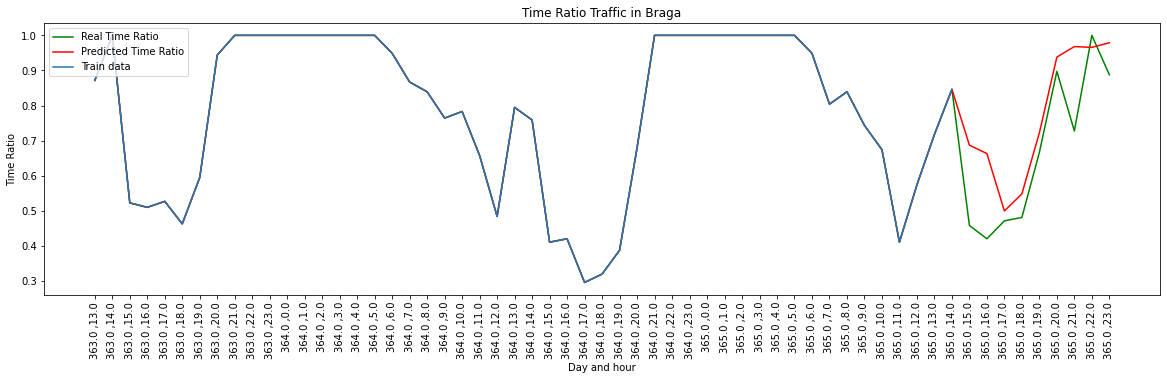

In [71]:
import matplotlib.pyplot as plt

def make_plot(street_number,n_time_step,predictions,true_values,x_axis):

  plt.figure(figsize=(20,5))
  
  #10 - 1 = 9
  i = n_time_step - 1

  x_axis = np.asarray(x_axis)

  x_axis_train = x_axis[:len(x_axis) - i][-50:]
  y_train = corrected_labels[:len(corrected_labels)-i][:,street_number][-50:]
  
  y_axis_predictions = np.append(y_train,np.asarray(predictions)[:,street_number],axis=0)
  y_axis_true_values = np.append(y_train,np.asarray(true_values)[:,street_number],axis=0)
 
  # plt.plot(x_axis[-60:-1],y_axis_true_values,'b')
  # plt.plot(x_axis[-60:-1],y_axis_predictions,'r')
  plt.plot(x_axis[-59:],y_axis_true_values,'g')
  plt.plot(x_axis[-59:],y_axis_predictions,'r')
  plt.plot(x_axis_train,y_train) 

  plt.title("Time Ratio Traffic in Braga")
  plt.xlabel("Day and hour")
  plt.xticks(rotation=90)
  plt.ylabel("Time Ratio")
  plt.legend([
            'Real Time Ratio',
            'Predicted Time Ratio',
            'Train data'
            ],loc = 'upper left')
  
  plt.legend
  plt.show()

make_plot(1,n_time_step,predictions,true_values,x_axis)

In [0]:
def save_model(model_name, losses, epochs, batch_size, time_step, units,stateless = True):
    import os
    import csv
    from matplotlib import pyplot as plt

    
    csv_file = model_name + ".csv"
    
    file_exists = os.path.isfile(csv_file)
    
    
    with open (csv_file, 'a') as csvfile:
        headers = ['Loss' , 'Units', 'Time Step','Epochs', 'Stateless', 'Batch']
        
        writer = csv.DictWriter(csvfile, delimiter=',', lineterminator='\n',fieldnames=headers)

        if not file_exists:
            writer.writeheader()  # file doesn't exist yet, write a header
        
      
        # summarize history for loss
        #plt.plot(range(0,epochs),losses,'o')
        #plt.title('model loss')
        #plt.ylabel('loss')
        #plt.xlabel('epoch')
      
        #loss = "loss.png"  
        #plt.savefig(loss)
        #plt.show()
        
        
        writer.writerow({'Loss': losses[-1],
                         'Units': units,
                         'Time Step': time_step,
                         'Epochs': epochs,
                         'Stateless': stateless,
                         'Batch': batch_size
        })
                         
save_model("model",losses,epochs,0,5,[16,16,16])